In [1]:
#import necessary packages

import pathlib as Path
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import pandas as pd
import torch
import torch.nn as nn
import torchvision.models
#from torchsummary import summary
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torch.nn.utils.rnn import pad_sequence 
import torch.nn.functional as F
import os
import pydicom as dicom
import matplotlib.patches as mpatches
import matplotlib.animation as animation
import matplotlib.image as img
import zipfile
import cv2
#from google.colab.patches import cv2_imshow
from tqdm import tqdm
import time
from PIL import Image
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [26]:
scan_dir = 'data/images'
mask_dir = 'mask'

scan_list = os.listdir(scan_dir)
mask_list = os.listdir(mask_dir)

In [113]:
classes = {
    0 : 'background',
    1 : 'pelvic bone',
    2 : 'femur',
    3 : 'low spine bone',
    4 : 'mid spine bone',
    5 : 'high spine bone'
}

In [114]:
# functtion that shows 6 tissues ground truth image
def mask2img(mask):
    palette = {
        0: (0, 0, 0),
        1: (255, 0, 0),
        2: (0, 255, 0),
        3: (0, 0, 255),
        4: (0, 255, 255),
        5: (255, 255, 0)
    }
    palette_norm = {
        0: (0, 0, 0),
        1: (1, 0, 0),
        2: (0, 1, 0),
        3: (0, 0, 1),
        4: (0, 1, 1),
        5: (1, 1, 0)
    }
    rows = mask.shape[0]
    cols = mask.shape[1]
    image = np.zeros((rows, cols, 3), dtype=np.uint8)
    for j in range(rows):
        for i in range(cols):
            image[j, i] = palette[int(mask[j, i])]

    patch0 = mpatches.Patch(color=palette_norm[0], label=classes[0])
    patch1 = mpatches.Patch(color=palette_norm[1], label=classes[1])
    patch2 = mpatches.Patch(color=palette_norm[2], label=classes[2])
    patch3 = mpatches.Patch(color=palette_norm[3], label=classes[3])
    patch4 = mpatches.Patch(color=palette_norm[4], label=classes[4])

    handles = [patch0, patch1, patch2, patch3, patch4]
    return image, handles

In [125]:
def show_pair(scan_num=5, slice_num=27):
    image = 'images_' + str(scan_num)
    mask = 'images_' + str(scan_num) + '_mask.nii'

    image_dir = os.path.join(scan_dir, image)
    mask = os.path.join(mask_dir, mask)
    scan = os.path.join(image_dir, sorted(os.listdir(image_dir))[slice_num-1])

    test_img = dicom.read_file(scan)
    test_img = test_img.pixel_array

    mask_img = nib.load(mask).get_fdata()
    mask_img = np.rot90(mask_img, 1)
    mask_img = cv2.flip(mask_img, 0)
    
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(test_img, cmap=plt.cm.bone)  # set the color map to bone
    mask_image, handles = mask2img(mask_img[:,:,slice_num-1])
    print(mask_image.shape)
    ax[1].imshow(mask_image)
    ax[1].legend(handles=handles, bbox_to_anchor=(1.85, 1))
    fig.savefig('figs/test_scan_mask_pair.jpg')
    fig.suptitle('Side-by-Side Comparsion Between 2D Slice and Mask')
    print(np.unique(mask_img[:,:,slice_num-1]))

(384, 384, 3)
[0. 1. 2. 3. 4. 5.]


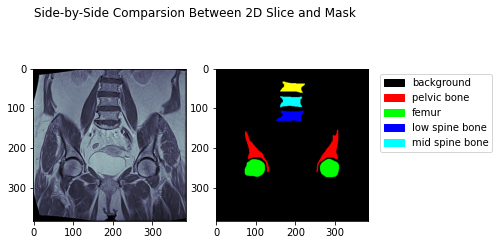

In [126]:
show_pair()